# KPT tungsten plug thickness study

Analysis of results from the 5B photon simulation of the KLF beamline, take 5, with a variable-length tungsten plug.

In [1]:
import ROOT
#%jsroot on
import os
os.chdir("/srv/jupyter/hdgeant4 studies")
import pyxrootd.client as xclient
import numpy as np
#%pip install --user "gluex.jupyroot>=1.0.10"
from gluex.jupyroot.treeview import treeview

In [2]:
xrdurl = "root://cn445.storrs.hpc.uconn.edu"
xrdpath = "/Gluex/resilient/simulation/KLFbeam-8-2024/"
rfile1 = ROOT.TFile.Open(xrdurl + xrdpath + "bgprofiles5_1.root")
det5 = rfile1.Get("det5")
chain = ROOT.TChain(det5.GetName(), det5.GetTitle())
xfs = xclient.FileSystem(xrdurl)
for f in xfs.dirlist(xrdpath)[1]['dirlist']:
    if "bgprofiles5_" in f['name']:
        chain.Add(xrdurl + xrdpath + f['name'])
print("chain", chain.GetName(), "created with", chain.GetNtrees(), "files")
tview = treeview(chain, "Klong_beam5.root/det5")
tviewa = treeview(chain, "Klong_beam7.root/det5")
tview2 = treeview(chain, "Klong_hits2.root")
tview5 = treeview(chain, "Klong_hits5.root")
tview7 = treeview(chain, "Klong_hits7.root")

chain det5 created with 10000 files


In [3]:
def scale_errors(h1d, factor=1):
    """
    Rescale the errors on the contents of a 1d histogram by factor.
    """
    for i in range(h1d.GetNbinsX()):
        h1d.SetBinError(i+1, h1d.GetBinError(i+1) * factor)

## Particle rates at the GlueX target vs W-plug thickness

klong absorption length in tungsten plug is 7.80 +/- 0.58 cm
klong absorption length in tungsten plug is 8.90 +/- 0.78 cm


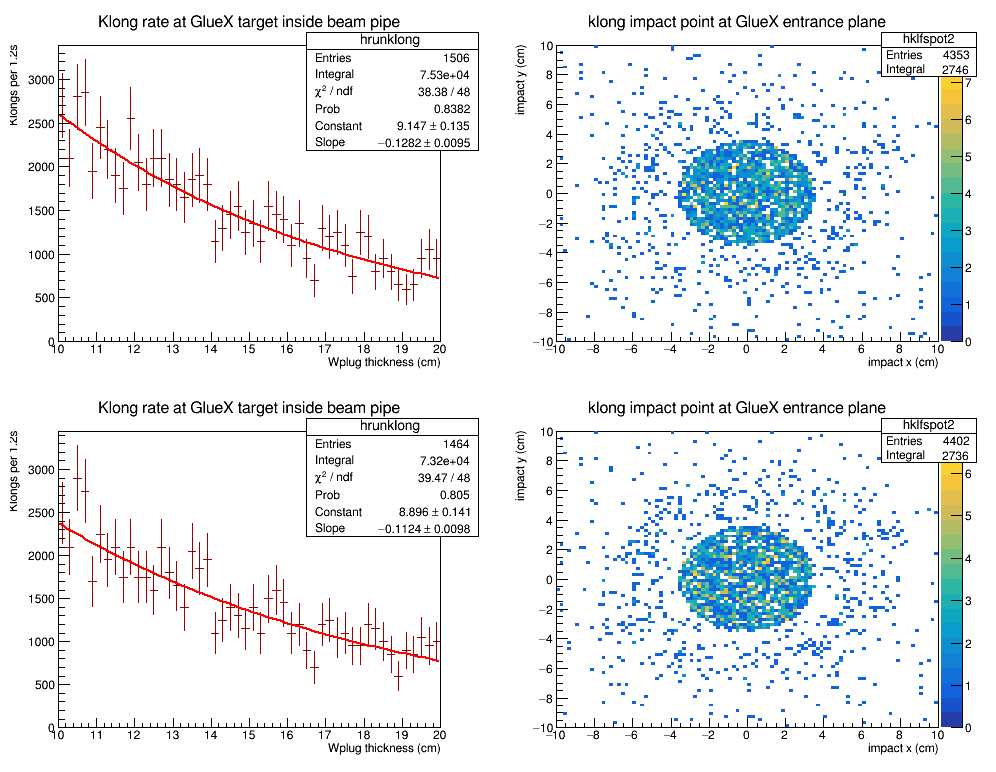

In [4]:
n = tview.draw([['hrunklong', 'hklfspot2'] for i in range(2)],
               [['', 'colz'] for i in range(2)], stats="ien")
ipane = 1
for tv in (tview, tviewa):
    tview.current_canvas.cd(ipane)
    hrunklong = tv.get('hrunklong')
    hrunklong.SetLineColor(ROOT.kRed + 2)
    ROOT.gStyle.SetOptFit(1111)
    hrunklong.SetTitle("Klong rate at GlueX target inside beam pipe")
    hrunklong.GetXaxis().SetLimits(10, 20)
    hrunklong.GetXaxis().SetTitle("Wplug thickness (cm)")
    hrunklong.GetYaxis().SetTitle("Klongs per 1.2s")
    hrunklong.Rebin(4)
    hrunklong.Scale(hrunklong.GetNbinsX())
    hrunklong.SetMinimum(0)
    hrunklong.Fit('expo', 'q')
    abscoef = hrunklong.GetListOfFunctions().FindObject('expo').GetParameter(1)
    abscoeferr = hrunklong.GetListOfFunctions().FindObject('expo').GetParError(1)
    print(f"klong absorption length in tungsten plug is {abs(1/abscoef):0.2f} +/- {abs(abscoeferr)/abscoef**2:0.2f} cm")
    ipane += 2
tview.current_canvas.cd(4)
tviewa.get('hklfspot2').Draw('colz')
tview.current_canvas.cd(0)
tview.current_canvas.Draw()

gamma absorption length in tungsten plug is 1.459 +/- 0.001 cm
gamma absorption length in tungsten plug is 1.459 +/- 0.001 cm


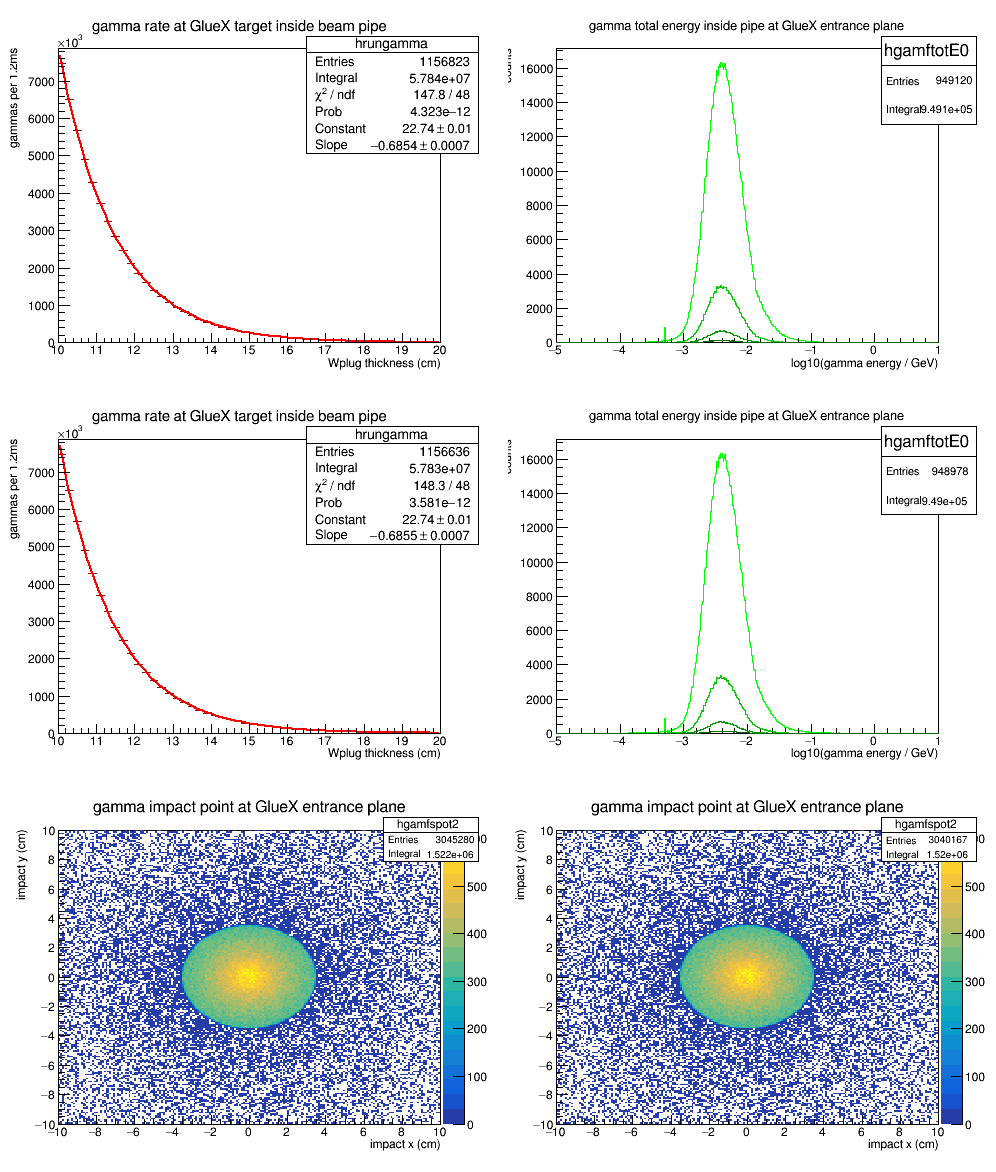

In [5]:
n = tview.draw([['hrungamma', 'hrungamma'], ['hrungamma', 'hrungamma'], ['hgamfspot2',]],
               [['', ''], ['', ''], ['colz',]], stats="ien")
ipane = 1
for tv in (tview, tviewa):
    tview.current_canvas.cd(ipane)
    hrungamma = tv.get('hrungamma')
    hrungamma.SetLineColor(ROOT.kRed + 2)
    ROOT.gStyle.SetOptFit(1111)
    hrungamma.SetTitle("gamma rate at GlueX target inside beam pipe")
    hrungamma.GetXaxis().SetLimits(10, 20)
    hrungamma.GetXaxis().SetTitle("Wplug thickness (cm)")
    hrungamma.GetYaxis().SetTitle("gammas per 1.2ms")
    hrungamma.Rebin(4)
    hrungamma.Scale(hrungamma.GetNbinsX())
    hrungamma.SetMinimum(0)
    hrungamma.Fit('expo', 'q')
    abscoef = hrungamma.GetListOfFunctions().FindObject('expo').GetParameter(1)
    abscoeferr = hrungamma.GetListOfFunctions().FindObject('expo').GetParError(1)
    print(f"gamma absorption length in tungsten plug is {abs(1/abscoef):0.3f} +/- {abs(abscoeferr)/abscoef**2:0.3f} cm")
    tview.current_canvas.cd(ipane + 1)
    hgamftotE = [0]*4
    opt = ''
    for i in range(4):
        hgamftotE[i] = tv.get(f'hgamftotE{i}')
        hgamftotE[i].SetLineColor(ROOT.kGreen + i)
        hgamftotE[i].Draw(opt)
        opt = 'same'
    ipane += 2
tview.current_canvas.cd(6)
tviewa.get("hgamfspot2").Draw('colz')
tview.current_canvas.cd(0)
tview.current_canvas.Draw()

neutron absorption length in tungsten plug is 8.34 +/- 0.69 cm
neutron absorption length in tungsten plug is 7.96 +/- 0.64 cm


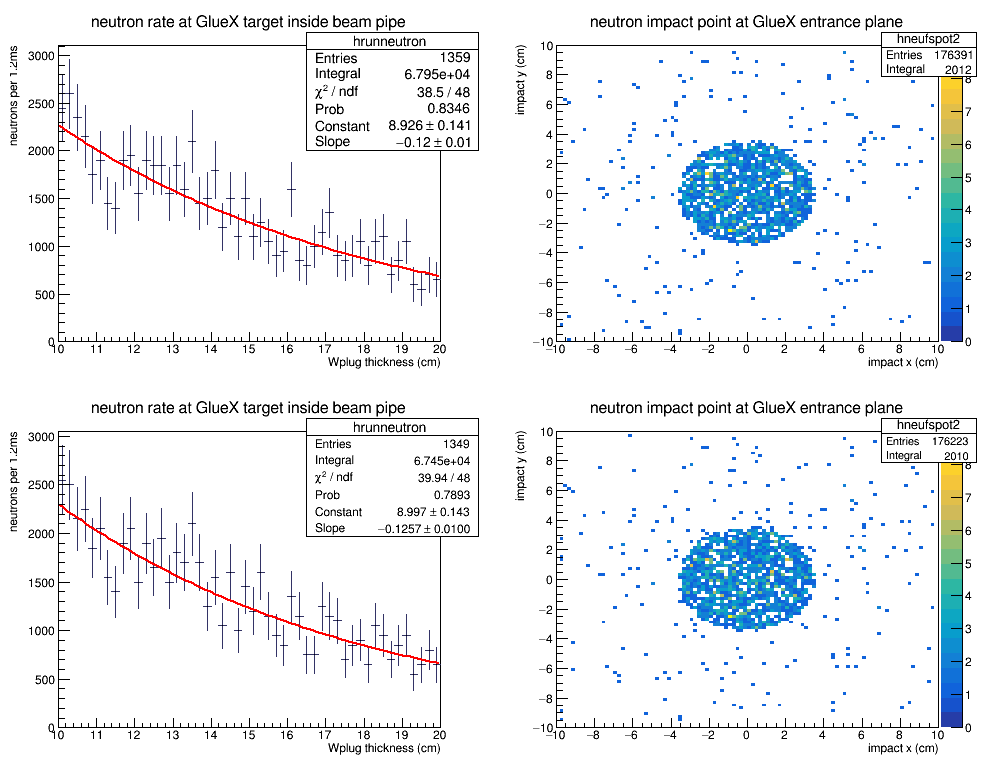

In [6]:
n = tview.draw([['hrunneutron', 'hneufspot2'], ['hrunneutron', 'hneufspot2']],
               [['', 'colz'], ['', 'colz']], stats="ien")
ipane = 1
for tv in (tview, tviewa):
    tview.current_canvas.cd(ipane)
    hrunneutron = tv.get('hrunneutron')
    hrunneutron.SetLineColor(ROOT.kBlue - 1)
    ROOT.gStyle.SetOptFit(1111)
    hrunneutron.SetTitle("neutron rate at GlueX target inside beam pipe")
    hrunneutron.GetXaxis().SetLimits(10, 20)
    hrunneutron.GetXaxis().SetTitle("Wplug thickness (cm)")
    hrunneutron.GetYaxis().SetTitle("neutrons per 1.2ms")
    hrunneutron.Rebin(4)
    hrunneutron.Scale(hrunneutron.GetNbinsX())
    hrunneutron.SetMinimum(0)
    hrunneutron.Fit('expo', 'q')
    expo = hrunneutron.GetListOfFunctions().FindObject('expo')
    abscoef = expo.GetParameter(1)
    abscoeferr = expo.GetParError(1)
    print(f"neutron absorption length in tungsten plug is {abs(1/abscoef):0.2f} +/- {abs(abscoeferr)/abscoef**2:0.2f} cm")
    ipane += 2
tview.current_canvas.cd(4)
tviewa.get("hneufspot2").Draw("colz")
tview.current_canvas.cd(0)
tview.current_canvas.Draw()

## Plot detector hit rates normalized to the 64ns pulse period

In [7]:
hnorm = {}

start counter rate attenuation length in tungsten plug is 1.47 +/- 0.01 cm
start counter rate attenuation length in tungsten plug is 1.74 +/- 0.07 cm
****************************************
Minimizer is Minuit2 / Migrad
Chi2                      =      147.933
NDf                       =          198
Edm                       =  1.68478e-06
NCalls                    =           46
Constant                  =      9.83125   +/-   0.0750162   
Slope                     =    -0.682488   +/-   0.00650597  
****************************************
Minimizer is Minuit2 / Migrad
Chi2                      =      157.401
NDf                       =          194
Edm                       =  8.20086e-07
NCalls                    =           69
Constant                  =       6.3139   +/-   0.256438    
Slope                     =    -0.575052   +/-   0.021785    


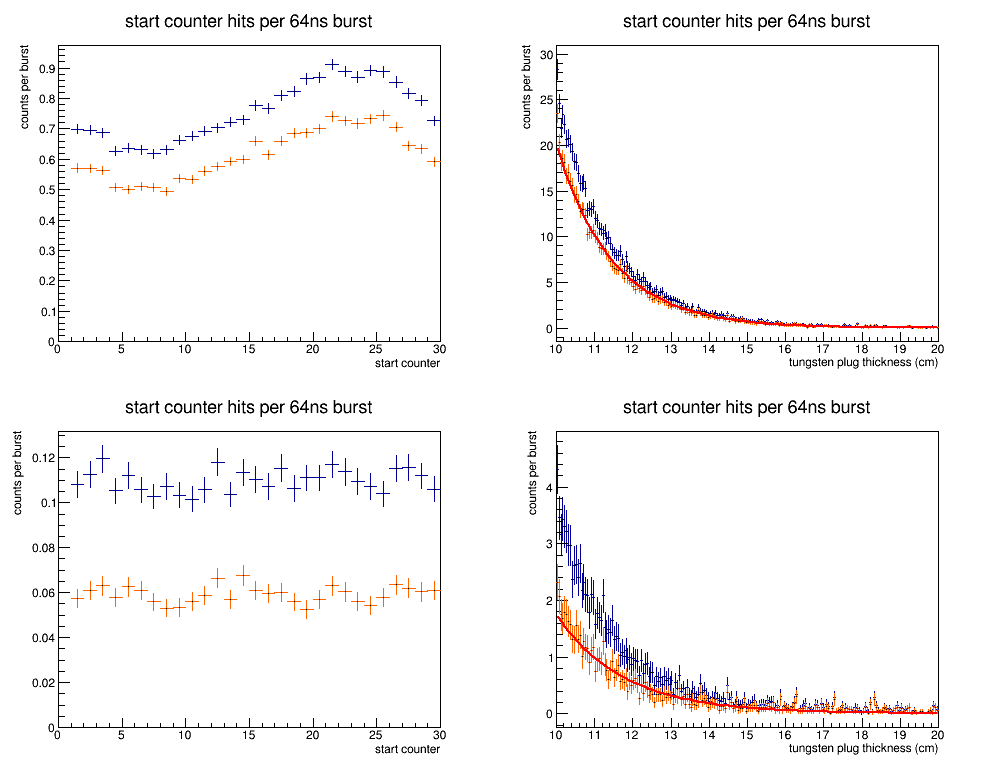

In [8]:
tview2.draw([['hsc', 'hsc'], ['hsc', 'hsc']], stats="ien")
ipane = 1
for tv in (tview5, tview7):
    tview2.current_canvas.cd(ipane)
    draw_option = ""
    for hname in ('hsc', 'hsc_dEmin'):
        horig = tv.get(hname)
        hname2 = hname + f"_norm{ipane}"
        hnorm[hname2] = horig.Clone(hname2)
        horig.Delete()
        hnorm[hname2].SetTitle("start counter hits per 64ns burst")
        hnorm[hname2].Scale(64e-9 / 1.2e-3)
        hnorm[hname2].GetYaxis().SetTitle("counts per burst")
        hnorm[hname2].GetXaxis().SetRangeUser(0, 30)
        hnorm[hname2].SetStats(0)
        hnorm[hname2].Draw(draw_option)
        draw_option = "same"
    ipane += 2
ipane = 2
for tv in (tview5, tview7):
    tview2.current_canvas.cd(ipane)
    draw_option = ""
    for hname in ('hscrun', 'hscrun_dEmin'):
        horig = tv.get(hname)
        hname2 = hname + f"_norm{ipane}"
        hnorm[hname2] = horig.Clone(hname2)
        horig.Delete()
        hnorm[hname2].SetStats(0)
        hnorm[hname2].SetTitle("start counter hits per 64ns burst")
        hnorm[hname2].Rebin(5)
        scale_errors(hnorm[hname2], 2)
        hnorm[hname2].Scale(hnorm[hname2].GetNbinsX() * 64e-9 / 1.2e-3)
        hnorm[hname2].GetXaxis().SetLimits(10, 20)
        hnorm[hname2].GetXaxis().SetTitle("tungsten plug thickness (cm)")
        hnorm[hname2].GetYaxis().SetTitle("counts per burst")
        hnorm[hname2].Draw(draw_option)
        draw_option = "same"
    hnorm[hname2].Fit("expo", "")
    abscoef = hnorm[hname2].GetListOfFunctions().FindObject('expo').GetParameter(1)
    abscoeferr = hnorm[hname2].GetListOfFunctions().FindObject('expo').GetParError(1)
    print(f"start counter rate attenuation length in tungsten plug is {abs(1/abscoef):0.2f} +/- {abs(abscoeferr)/abscoef**2:0.2f} cm")
    ipane += 2
ipane = 1
for tv in (tview5, tview7):
    tview2.current_canvas.cd(ipane)
    draw_option = ""
    for hname,hrunname in {'hsc': 'hscrun', 'hsc_dEmin': 'hscrun_dEmin'}.items():
        hname2 = hname + f"_norm{ipane}"
        hrunname2 = hrunname + f"_norm{ipane+1}"
        hnorm[hname2].Scale(hnorm[hrunname2].Integral(1,10)/10 / hnorm[hname2].Integral())
        hnorm[hname2].Draw(draw_option)
        draw_option = "same"
    ipane += 2
cname = tview2.current_canvas.GetName()
tview2.canvases[cname].cd(0)
tview2.canvases[cname].Draw()

In [9]:
def expo2f(var,par):
    x = [par[0] + par[1] * (var[0] - 10), par[2] + par[3] * (var[0] - 10)]
    sum = 0
    for i in range(2):
        if x[i] > -100 and x[i] < 100:
            sum += np.exp(x[i])
        else:
            sum += 1e9
    return sum

cdc rate attenuation lengths in tungsten plug are 0.75 +/- 0.20 cm and 6.44 +/- 1.49 cm
cdc rate attenuation lengths in tungsten plug are 1.13 +/- 0.25 cm and 8.38 +/- 3.67 cm
****************************************
Minimizer is Minuit2 / Migrad
Chi2                      =      45.1666
NDf                       =           46
Edm                       =  1.56332e-08
NCalls                    =          486
p0                        =     0.345563   +/-   0.140495    
p1                        =     -1.33239   +/-   0.350564    
p2                        =    -0.646613   +/-   0.232011    
p3                        =    -0.155221   +/-   0.035867    
****************************************
Minimizer is Minuit2 / Migrad
Chi2                      =      61.2105
NDf                       =           46
Edm                       =  1.61028e-06
NCalls                    =          517
p0                        =     0.334502   +/-   0.12164     
p1                        =    -0.886798   +

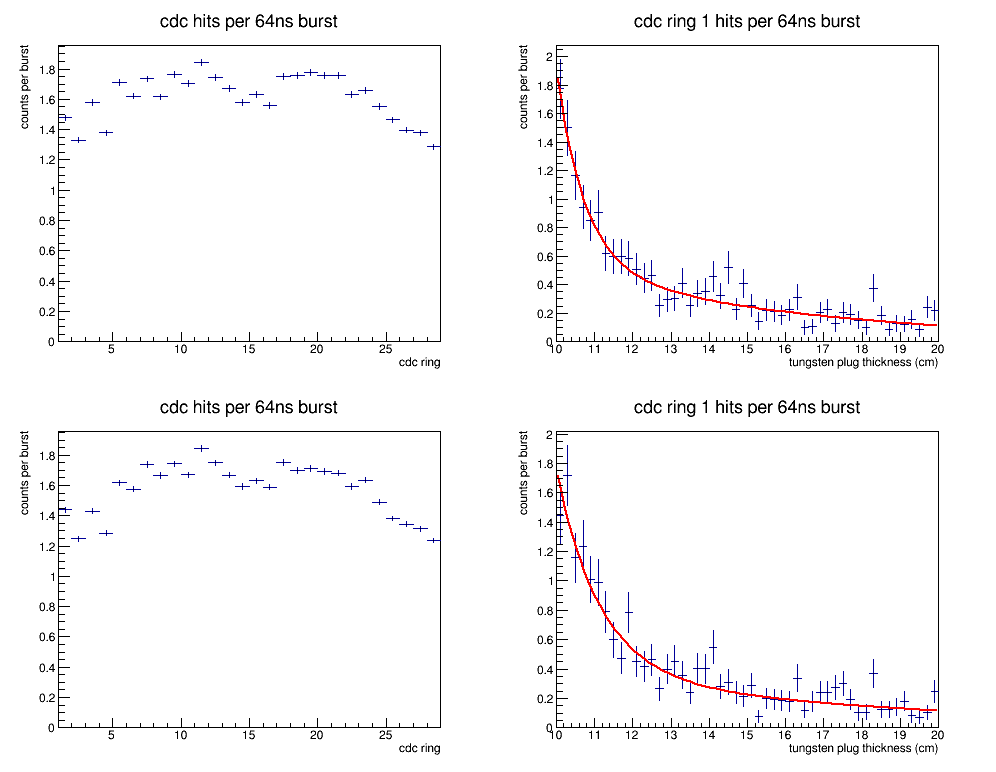

In [10]:
tview2.draw([['hcdc', 'hcdc'], ['hcdc', 'hcdc']], stats="ien")
ipane = 1
for tv in (tview5, tview7):
    tview2.current_canvas.cd(ipane)
    draw_option = ""
    for hname in ('hcdc',):
        horig = tv.get(hname).ProjectionY()
        hname2 = hname + f"_norm{ipane}"
        hnorm[hname2] = horig.Clone(hname2)
        horig.Delete()
        hnorm[hname2].SetTitle("cdc hits per 64ns burst")
        hnorm[hname2].Scale(64e-9 / 1.2e-3)
        hnorm[hname2].GetYaxis().SetTitle("counts per burst")
        hnorm[hname2].SetStats(0)
        hnorm[hname2].SetMinimum(0)
        hnorm[hname2].SetMaximum(hnorm[hname2].GetMaximum() * 1.1)
        hnorm[hname2].Draw(draw_option)
        draw_option = "same"
    ipane += 2
ipane = 2
for tv in (tview5, tview7):
    tview2.current_canvas.cd(ipane)
    draw_option = ""
    for hname in ('hcdcrun',):
        horig = tv.get(hname)
        hname2 = hname + f"_norm{ipane}"
        hnorm[hname2] = horig.Clone(hname2)
        horig.Delete()
        hnorm[hname2].SetStats(0)
        hnorm[hname2].SetTitle("cdc ring 1 hits per 64ns burst")
        hnorm[hname2].Rebin(20)
        hnorm[hname2].Scale(hnorm[hname2].GetNbinsX() * 64e-9 / 1.2e-3)
        scale_errors(hnorm[hname2], 3)
        hnorm[hname2].GetXaxis().SetLimits(10, 20)
        hnorm[hname2].GetXaxis().SetTitle("tungsten plug thickness (cm)")
        hnorm[hname2].GetYaxis().SetTitle("counts per burst")
        hnorm[hname2].SetMinimum(0)
        hnorm[hname2].Draw(draw_option)
        draw_option = "same"
    expo2 = ROOT.TF1("expo2", expo2f, 10, 20, 4)
    expo2.SetParameters(10, -1, 10, -0.1)
    hnorm[hname2].Fit(expo2, "R")
    abscoef = [expo2.GetParameter(i) for i in (1,3)]
    abscoeferr = [expo2.GetParError(i) for i in (1,3)]
    print(f"cdc rate attenuation lengths in tungsten plug are",
          f"{abs(1/abscoef[0]):0.2f} +/- {abs(abscoeferr[0])/abscoef[0]**2:0.2f} cm and",
          f"{abs(1/abscoef[1]):0.2f} +/- {abs(abscoeferr[1])/abscoef[1]**2:0.2f} cm")
    ipane += 2
ipane = 1
for tv in (tview5, tview7):
    tview2.current_canvas.cd(ipane)
    draw_option = ""
    for hname,hrunname in {'hcdc': 'hcdcrun'}.items():
        hname2 = hname + f"_norm{ipane}"
        hrunname2 = hrunname + f"_norm{ipane+1}"
        hnorm[hname2].Scale(hnorm[hrunname2].Integral(1,3)/3 / hnorm[hname2].Integral(1,1))
        hnorm[hname2].SetMinimum(0)
        hnorm[hname2].Draw(draw_option)
        draw_option = "same"
    ipane += 2
tview2.current_canvas.cd(0)
tview2.current_canvas.Draw()

fdc rate attenuation lengths in tungsten plug are 1.16 +/- 0.07 cm and 3.93 +/- 0.51 cm
fdc rate attenuation lengths in tungsten plug are 1.20 +/- 0.06 cm and 4.39 +/- 0.62 cm
****************************************
Minimizer is Minuit2 / Migrad
Chi2                      =      101.542
NDf                       =           87
Edm                       =  7.59204e-07
NCalls                    =          669
p0                        =      2.16854   +/-   0.0379654   
p1                        =    -0.865206   +/-   0.0492398   
p2                        =     0.386234   +/-   0.264564    
p3                        =    -0.254592   +/-   0.0330991   
****************************************
Minimizer is Minuit2 / Migrad
Chi2                      =      103.913
NDf                       =           87
Edm                       =  2.65103e-07
NCalls                    =          635
p0                        =      2.21883   +/-   0.030721    
p1                        =     -0.83156   +

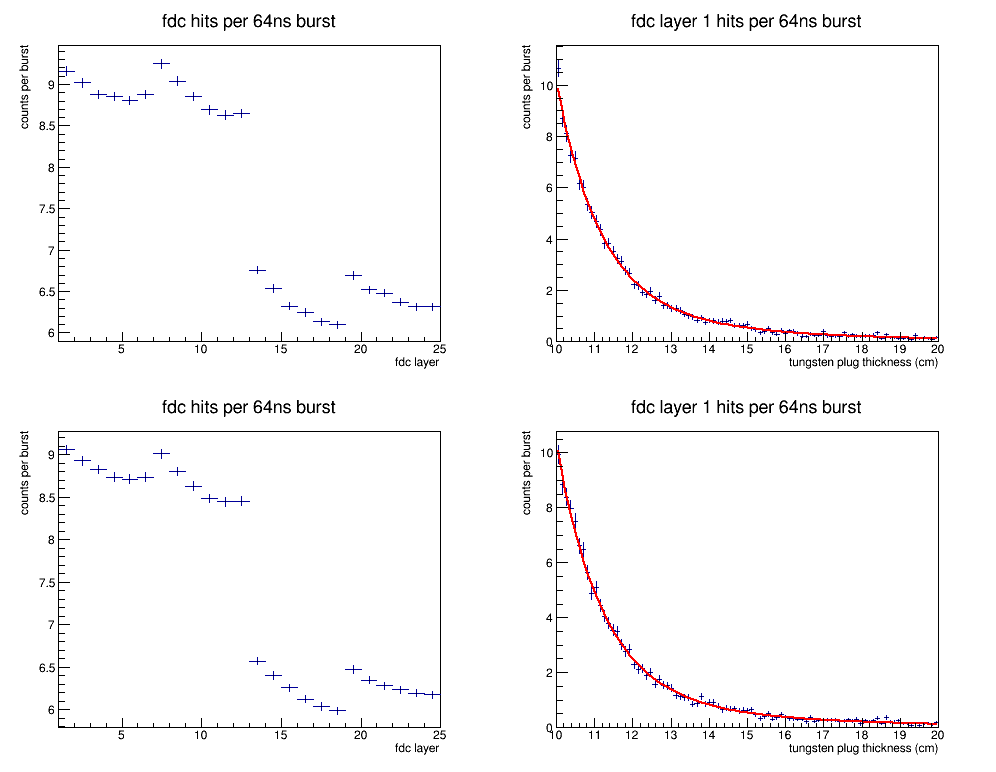

In [11]:
tview2.draw([['hfdc', 'hfdc'], ['hfdc', 'hfdc']], stats="ien")
ipane = 1
for tv in (tview5, tview7):
    tview2.current_canvas.cd(ipane)
    draw_option = ""
    for hname in ('hfdc',):
        horig = tv.get(hname).ProjectionY()
        hname2 = hname + f"_norm{ipane}"
        hnorm[hname2] = horig.Clone(hname2)
        horig.Delete()
        hnorm[hname2].SetTitle("fdc hits per 64ns burst")
        hnorm[hname2].GetYaxis().SetTitle("counts per burst")
        hnorm[hname2].Scale(64e-9 / 1.2e-3)
        hnorm[hname2].SetStats(0)
        hnorm[hname2].SetMinimum(0)
        hnorm[hname2].SetMaximum(hnorm[hname2].GetMaximum() * 1.1)
        hnorm[hname2].Draw(draw_option)
        draw_option = "same"
    ipane += 2
ipane = 2
for tv in (tview5, tview7):
    tview2.current_canvas.cd(ipane)
    draw_option = ""
    for hname in ('hfdcrun',):
        horig = tv.get(hname)
        hname2 = hname + f"_norm{ipane}"
        hnorm[hname2] = horig.Clone(hname2)
        horig.Delete()
        hnorm[hname2].SetStats(0)
        hnorm[hname2].SetTitle("fdc layer 1 hits per 64ns burst")
        hnorm[hname2].GetYaxis().SetTitle("counts per burst")
        hnorm[hname2].Rebin(1000)
        hnorm[hname2].Scale(hnorm[hname2].GetNbinsX() * 64e-9 / 1.2e-3)
        scale_errors(hnorm[hname2], 1.5)
        hnorm[hname2].GetXaxis().SetLimits(10, 20)
        hnorm[hname2].GetXaxis().SetTitle("tungsten plug thickness (cm)")
        hnorm[hname2].GetYaxis().SetTitle("counts per burst")
        hnorm[hname2].SetMinimum(0)
        hnorm[hname2].Draw(draw_option)
        draw_option = "same"
    expo2.SetParameters(10, -1, 10, -0.1)
    hnorm[hname2].Fit(expo2, "R")
    abscoef = [expo2.GetParameter(i) for i in (1,3)]
    abscoeferr = [expo2.GetParError(i) for i in (1,3)]
    print(f"fdc rate attenuation lengths in tungsten plug are",
          f"{abs(1/abscoef[0]):0.2f} +/- {abs(abscoeferr[0])/abscoef[0]**2:0.2f} cm and",
          f"{abs(1/abscoef[1]):0.2f} +/- {abs(abscoeferr[1])/abscoef[1]**2:0.2f} cm")
    ipane += 2
ipane = 1
for tv in (tview5, tview7):
    tview2.current_canvas.cd(ipane)
    draw_option = ""
    for hname,hrunname in {'hfdc': 'hfdcrun'}.items():
        hname2 = hname + f"_norm{ipane}"
        hrunname2 = hrunname + f"_norm{ipane+1}"
        hnorm[hname2].Scale(hnorm[hrunname2].Integral(1,3)/3 / hnorm[hname2].Integral(1,1))
        hnorm[hname2].Draw(draw_option)
        draw_option = "same"
    ipane += 2
tview2.current_canvas.cd(0)
tview2.current_canvas.Draw()

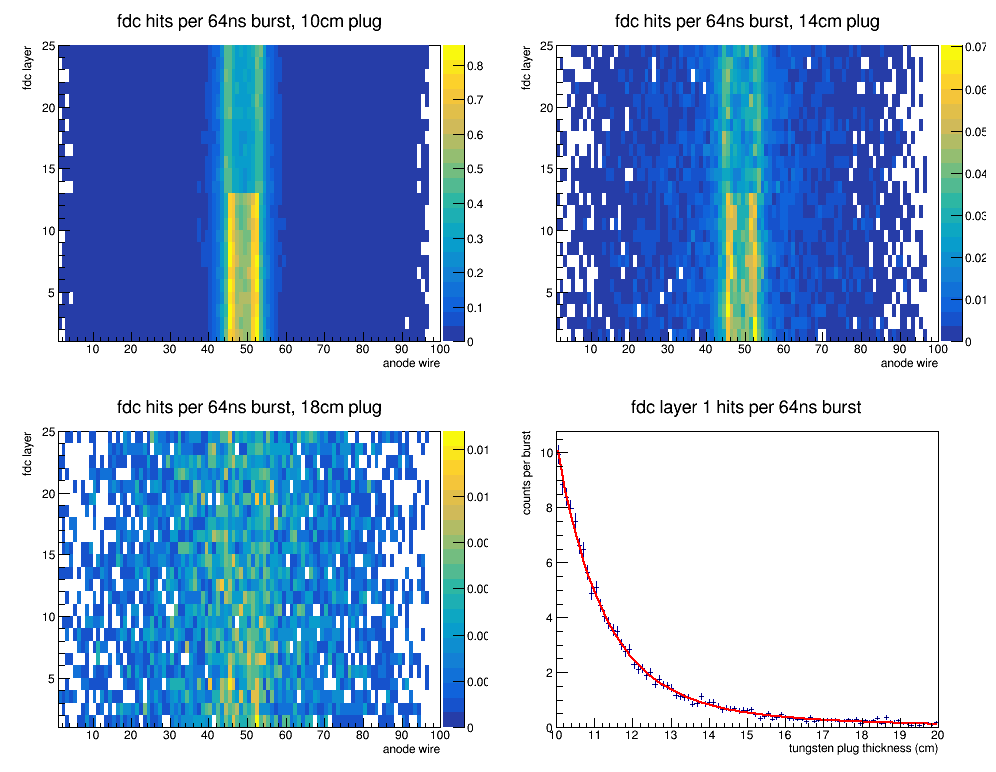

In [12]:
tview7.draw([['hfdc10', 'hfdc14'], ['hfdc18', 'hfdc18']],
            [['colz', 'colz'], ['colz','']], stats="ien")
lplug = {'hfdc10': 10, 'hfdc14': 14, 'hfdc18': 18}
ipane = 1
for tv in (tview7,):
    for hname in ('hfdc10','hfdc14'):
        tview7.current_canvas.cd(ipane)
        horig = tv.get(hname)
        hname2 = hname + f"_norm{ipane}"
        hnorm[hname2] = horig.Clone(hname2)
        horig.Delete()
        hnorm[hname2].SetTitle(f"fdc hits per 64ns burst, {lplug[hname]}cm plug")
        hnorm[hname2].Scale(64e-9 / 1.2e-3 * 20)
        hnorm[hname2].SetStats(0)
        hnorm[hname2].SetMinimum(0)
        hnorm[hname2].Draw('colz')
        ipane += 1
ipane = 3
for tv in (tview7,):
    for hname in ('hfdc18',):
        tview7.current_canvas.cd(ipane)
        horig = tv.get(hname)
        hname2 = hname + f"_norm{ipane}"
        hnorm[hname2] = horig.Clone(hname2)
        horig.Delete()
        hnorm[hname2].SetStats(0)
        hnorm[hname2].SetTitle(f"fdc hits per 64ns burst, {lplug[hname]}cm plug")
        hnorm[hname2].Scale(64e-9 / 1.2e-3 * 20)
        hnorm[hname2].SetStats(0)
        hnorm[hname2].SetMinimum(0)
        hnorm[hname2].Draw('colz')
        ipane += 1
tview7.current_canvas.cd(4)
hnorm['hfdcrun_norm4'].Draw()
tview7.current_canvas.cd(0)
tview7.current_canvas.Draw()

bcal rate attenuation lengths in tungsten plug are 0.45 +/- 0.24 cm and 9.22 +/- 0.69 cm
bcal rate attenuation lengths in tungsten plug are 0.82 +/- 0.38 cm and 10.38 +/- 1.10 cm
****************************************
Minimizer is Minuit2 / Migrad
Chi2                      =      52.4552
NDf                       =           46
Edm                       =  1.86215e-07
NCalls                    =          398
p0                        =     0.382925   +/-   0.425125    
p1                        =     -2.21924   +/-   1.20576     
p2                        =      1.50789   +/-   0.046099    
p3                        =     -0.10845   +/-   0.00810397  
****************************************
Minimizer is Minuit2 / Migrad
Chi2                      =      42.9683
NDf                       =           46
Edm                       =  3.63215e-07
NCalls                    =          507
p0                        =     0.341474   +/-   0.353543    
p1                        =     -1.21835 

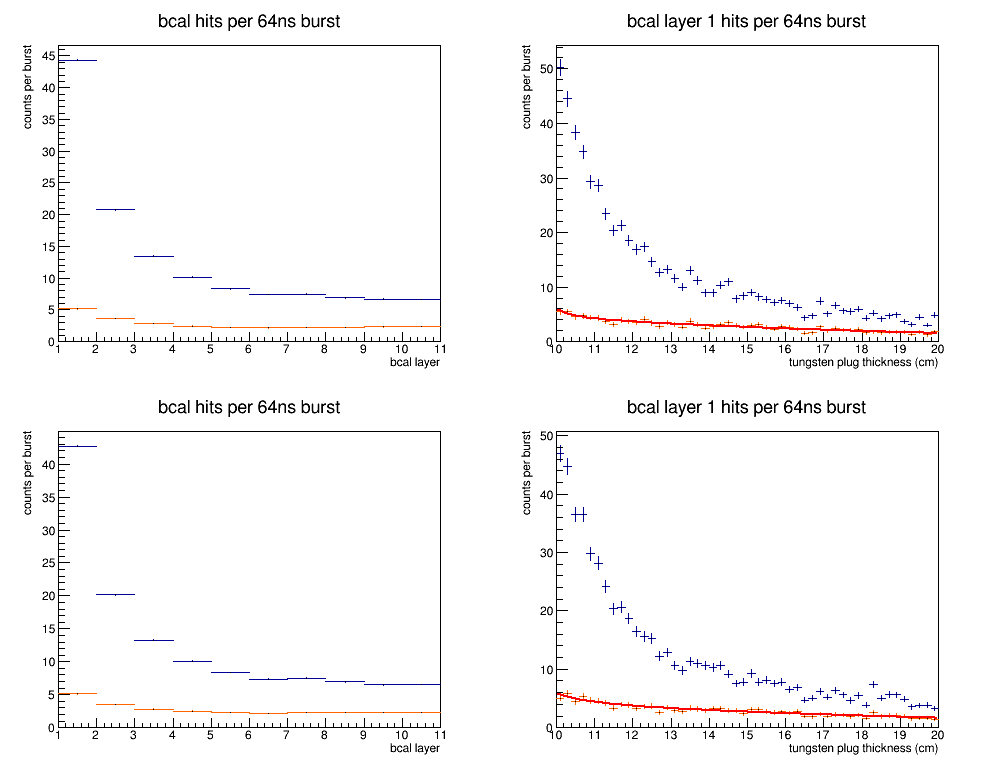

In [13]:
tview2.draw([['hbcal', 'hbcal'], ['hbcal', 'hbcal']], stats="ien")
ipane = 1
for tv in (tview5, tview7):
    tview2.current_canvas.cd(ipane)
    draw_option = ""
    for hname in ('hbcal', 'hbcal_dEmin'):
        horig = tv.get(hname).ProjectionY()
        hname2 = hname + f"_norm{ipane}"
        hnorm[hname2] = horig.Clone(hname2)
        horig.Delete()
        hnorm[hname2].SetTitle("bcal hits per 64ns burst")
        hnorm[hname2].Scale(64e-9 / 1.2e-3)
        hnorm[hname2].GetYaxis().SetTitle("counts per burst")
        hnorm[hname2].SetStats(0)
        hnorm[hname2].SetMinimum(0)
        hnorm[hname2].SetMaximum(hnorm[hname2].GetMaximum() * 1.1)
        hnorm[hname2].Draw(draw_option)
        draw_option = "same"
    tview2.current_canvas.cd(ipane + 1)
    draw_option = ""
    for hname in ('hbcalrun', 'hbcalrun_dEmin'):
        horig = tv.get(hname)
        hname2 = hname + f"_norm{ipane}"
        hnorm[hname2] = horig.Clone(hname2)
        horig.Delete()
        hnorm[hname2].SetStats(0)
        hnorm[hname2].SetTitle("bcal layer 1 hits per 64ns burst")
        hnorm[hname2].Rebin(20)
        hnorm[hname2].Scale(hnorm[hname2].GetNbinsX() * 64e-9 / 1.2e-3)
        scale_errors(hnorm[hname2], 4)
        hnorm[hname2].GetXaxis().SetLimits(10, 20)
        hnorm[hname2].GetXaxis().SetTitle("tungsten plug thickness (cm)")
        hnorm[hname2].GetYaxis().SetTitle("counts per burst")
        hnorm[hname2].SetMinimum(0)
        hnorm[hname2].Draw(draw_option)
        draw_option = "same"
    expo2.SetParameters(10, -1, 10, -0.1)
    hnorm[hname2].Fit(expo2, "R")
    abscoef = [expo2.GetParameter(i) for i in (1,3)]
    abscoeferr = [expo2.GetParError(i) for i in (1,3)]
    print(f"bcal rate attenuation lengths in tungsten plug are",
          f"{abs(1/abscoef[0]):0.2f} +/- {abs(abscoeferr[0])/abscoef[0]**2:0.2f} cm and",
          f"{abs(1/abscoef[1]):0.2f} +/- {abs(abscoeferr[1])/abscoef[1]**2:0.2f} cm")
    ipane += 2
ipane = 1
for tv in (tview5, tview7):
    tview2.current_canvas.cd(ipane)
    draw_option = ""
    for hname,hrunname in {'hbcal': 'hbcalrun', 'hbcal_dEmin': 'hbcalrun_dEmin'}.items():
        hname2 = hname + f"_norm{ipane}"
        hrunname2 = hrunname + f"_norm{ipane}"
        hnorm[hname2].Scale(hnorm[hrunname2].Integral(1,3)/3 / hnorm[hname2].Integral(1,1))
        hnorm[hname2].SetMinimum(0)
        hnorm[hname2].Draw(draw_option)
        draw_option = "same"
    ipane += 2
tview2.current_canvas.cd(0)
tview2.current_canvas.Draw()

fcal rate attenuation lengths in tungsten plug are 8.79 +/- 0.60 cm
fcal rate attenuation lengths in tungsten plug are 8.53 +/- 0.57 cm
****************************************
Minimizer is Minuit2 / Migrad
Chi2                      =      40.6776
NDf                       =           48
Edm                       =  5.00469e-09
NCalls                    =           52
Constant                  =     0.889346   +/-   0.11066     
Slope                     =    -0.113775   +/-   0.00771375  
****************************************
Minimizer is Minuit2 / Migrad
Chi2                      =      45.8443
NDf                       =           48
Edm                       =  1.12191e-06
NCalls                    =           45
Constant                  =     0.971419   +/-   0.112859    
Slope                     =     -0.11721   +/-   0.0078928   


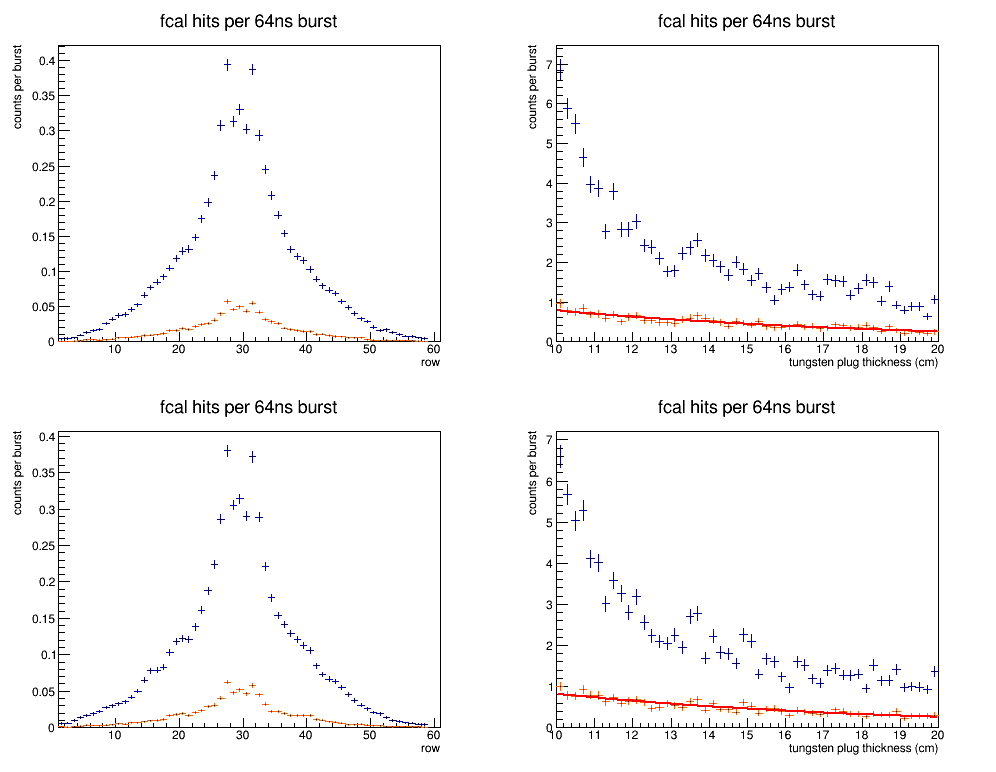

In [14]:
tview2.draw([['hfcal', 'hfcal'], ['hfcal', 'hfcal']], stats="ien")
ipane = 1
for tv in (tview5, tview7):
    tview2.current_canvas.cd(ipane)
    draw_option = ""
    for hname in ('hfcal', 'hfcal_dEmin'):
        horig = tv.get(hname).ProjectionY()
        hname2 = hname + f"_norm{ipane}"
        hnorm[hname2] = horig.Clone(hname2)
        horig.Delete()
        hnorm[hname2].SetTitle("fcal hits per 64ns burst")
        hnorm[hname2].Scale(64e-9 / 1.2e-3)
        hnorm[hname2].GetYaxis().SetTitle("counts per burst")
        hnorm[hname2].SetStats(0)
        hnorm[hname2].SetMinimum(0)
        hnorm[hname2].SetMaximum(hnorm[hname2].GetMaximum() * 1.1)
        hnorm[hname2].Draw(draw_option)
        draw_option = "same"
    tview2.current_canvas.cd(ipane + 1)
    draw_option = ""
    for hname in ('hfcalrun', 'hfcalrun_dEmin'):
        horig = tv.get(hname)
        hname2 = hname + f"_norm{ipane}"
        hnorm[hname2] = horig.Clone(hname2)
        horig.Delete()
        hnorm[hname2].SetStats(0)
        hnorm[hname2].SetTitle("fcal hits per 64ns burst")
        hnorm[hname2].Rebin(20)
        hnorm[hname2].Scale(hnorm[hname2].GetNbinsX() * 64e-9 / 1.2e-3)
        scale_errors(hnorm[hname2], 2)
        hnorm[hname2].GetXaxis().SetLimits(10, 20)
        hnorm[hname2].GetXaxis().SetTitle("tungsten plug thickness (cm)")
        hnorm[hname2].GetYaxis().SetTitle("counts per burst")
        hnorm[hname2].SetMinimum(0)
        hnorm[hname2].Draw(draw_option)
        draw_option = "same"
    hnorm[hname2].Fit('expo')
    expo = hnorm[hname2].GetListOfFunctions().FindObject('expo')
    abscoef = [expo.GetParameter(i) for i in (1,)]
    abscoeferr = [expo.GetParError(i) for i in (1,)]
    print(f"fcal rate attenuation lengths in tungsten plug are",
          f"{abs(1/abscoef[0]):0.2f} +/- {abs(abscoeferr[0])/abscoef[0]**2:0.2f} cm")
    ipane += 2
ipane = 1
for tv in (tview5, tview7):
    tview2.current_canvas.cd(ipane)
    draw_option = ""
    for hname,hrunname in {'hfcal': 'hfcalrun', 'hfcal_dEmin': 'hfcalrun_dEmin'}.items():
        hname2 = hname + f"_norm{ipane}"
        hrunname2 = hrunname + f"_norm{ipane}"
        hnorm[hname2].Scale(hnorm[hrunname2].Integral(1,3)/3 / hnorm[hname2].Integral())
        hnorm[hname2].Draw(draw_option)
        draw_option = "same"
    ipane += 2
tview2.current_canvas.cd(0)
tview2.current_canvas.Draw()

ftof rate attenuation lengths in tungsten plug are 0.95 +/- 0.06 cm and 5.62 +/- 0.67 cm
ftof rate attenuation lengths in tungsten plug are 1.05 +/- 0.07 cm and 7.04 +/- 1.14 cm


KeyError: 'htofrun_norm1'

****************************************
Minimizer is Minuit2 / Migrad
Chi2                      =      30.6114
NDf                       =           46
Edm                       =  3.78834e-06
NCalls                    =          505
p0                        =      1.92079   +/-   0.0355576   
p1                        =     -1.05042   +/-   0.0699042   
p2                        =     0.286409   +/-   0.149665    
p3                        =    -0.177846   +/-   0.0210401   
****************************************
Minimizer is Minuit2 / Migrad
Chi2                      =      43.2284
NDf                       =           46
Edm                       =  1.64076e-07
NCalls                    =          522
p0                        =      1.90179   +/-   0.0334846   
p1                        =    -0.952944   +/-   0.0594421   
p2                        =    0.0735474   +/-   0.171232    
p3                        =    -0.141973   +/-   0.0230345   


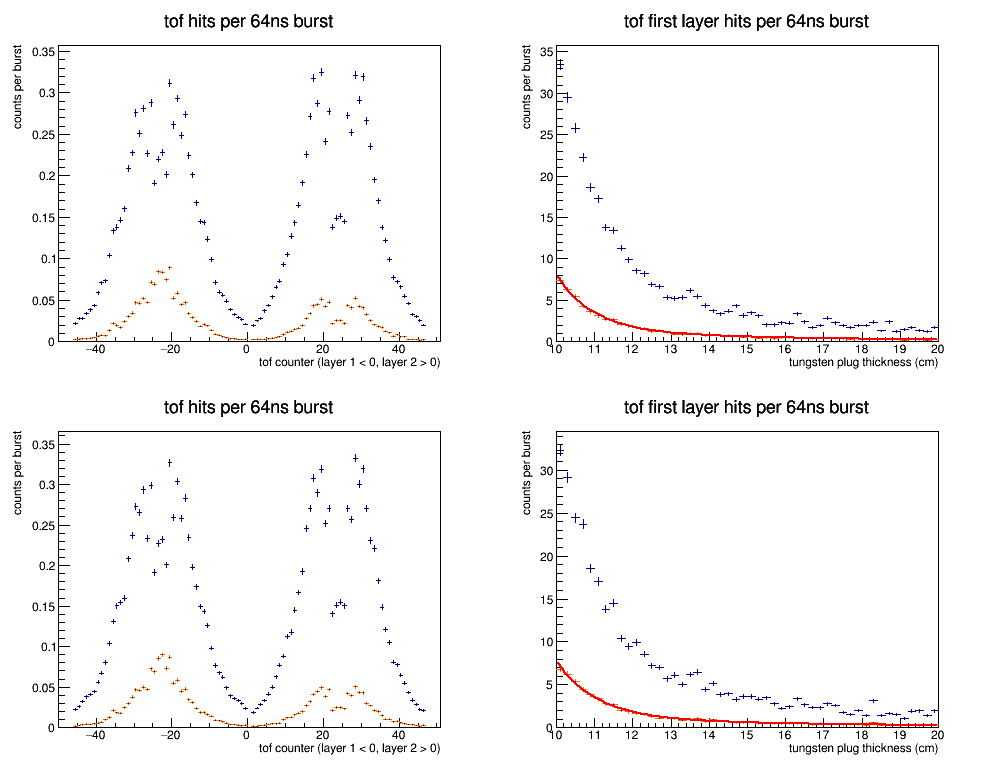

In [15]:
tview2.draw([['htof', 'htof'], ['htof', 'htof']], stats="ien")
ipane = 1
for tv in (tview5, tview7):
    tview2.current_canvas.cd(ipane)
    draw_option = ""
    for hname in ('htof', 'htof_dEmin'):
        horig = tv.get(hname)
        hname2 = hname + f"_norm{ipane}"
        hnorm[hname2] = horig.Clone(hname2)
        horig.Delete()
        hnorm[hname2].SetTitle("tof hits per 64ns burst")
        hnorm[hname2].Scale(64e-9 / 1.2e-3)
        hnorm[hname2].GetYaxis().SetTitle("counts per burst")
        hnorm[hname2].SetStats(0)
        hnorm[hname2].SetMinimum(0)
        hnorm[hname2].SetMaximum(hnorm[hname2].GetMaximum() * 1.1)
        hnorm[hname2].Draw(draw_option)
        draw_option = "same"
    tview2.current_canvas.cd(ipane + 1)
    draw_option = ""
    for hname in ('htofrun', 'htofrun_dEmin'):
        horig = tv.get(hname)
        hname2 = hname + f"_norm{ipane+1}"
        hnorm[hname2] = horig.Clone(hname2)
        horig.Delete()
        hnorm[hname2].SetStats(0)
        hnorm[hname2].SetTitle("tof first layer hits per 64ns burst")
        hnorm[hname2].Rebin(20)
        hnorm[hname2].Scale(hnorm[hname2].GetNbinsX() * 64e-9 / 1.2e-3)
        scale_errors(hnorm[hname2], 2)
        hnorm[hname2].GetXaxis().SetLimits(10, 20)
        hnorm[hname2].GetXaxis().SetTitle("tungsten plug thickness (cm)")
        hnorm[hname2].GetYaxis().SetTitle("counts per burst")
        hnorm[hname2].SetMinimum(0)
        hnorm[hname2].Draw(draw_option)
        draw_option = "same"
    expo2 = ROOT.TF1("expo2", expo2f, 10, 20, 4)
    expo2.SetParameters(10, -1, 10, -0.1)
    hnorm[hname2].Fit(expo2, "R")
    abscoef = [expo2.GetParameter(i) for i in (1,3)]
    abscoeferr = [expo2.GetParError(i) for i in (1,3)]
    print(f"ftof rate attenuation lengths in tungsten plug are",
          f"{abs(1/abscoef[0]):0.2f} +/- {abs(abscoeferr[0])/abscoef[0]**2:0.2f} cm and",
          f"{abs(1/abscoef[1]):0.2f} +/- {abs(abscoeferr[1])/abscoef[1]**2:0.2f} cm")
    ipane += 2
ipane = 1
for tv in (tview5, tview7):
    tview2.current_canvas.cd(ipane)
    draw_option = ""
    for hname,hrunname in {'htof': 'htofrun', 'htof_dEmin': 'htofrun_dEmin'}.items():
        hname2 = hname + f"_norm{ipane}"
        hrunname2 = hrunname + f"_norm{ipane}"
        hnorm[hname2].Scale(hnorm[hrunname2].Integral(1,3)/3 / hnorm[hname2].Integral(1,hnorm[hname2].FindBin(0)))
        draw_option = "same"
    ipane += 2
tview2.current_canvas.cd(0)
tview2.current_canvas.Draw()

In [ ]:
tview7.draw([['htof10', 'htof14'], ['htof18', 'htof18']], stats="ien")
lplug = {'htof10': 10, 'htof14': 14, 'htof18': 18}
ipane = 1
for tv in (tview7,):
    for hname in ('htof10','htof14'):
        tview7.current_canvas.cd(ipane)
        horig = tv.get(hname)
        hname2 = hname + f"_norm{ipane}"
        hnorm[hname2] = horig.Clone(hname2)
        horig.Delete()
        hnorm[hname2].SetTitle(f"ftof hits per 64ns burst, {lplug[hname]}cm plug")
        hnorm[hname2].GetYaxis().SetTitle("counts per burst")
        hnorm[hname2].Scale(64e-9 / 1.2e-3 * 20)
        hnorm[hname2].SetStats(0)
        hnorm[hname2].SetMinimum(0)
        hnorm[hname2].Draw()
        horig = tv.get(hname + "_dEmin")
        hname3 = hname + f"dEmin_norm{ipane}"
        hnorm[hname3] = horig.Clone(hname3)
        horig.Delete()
        hnorm[hname3].SetTitle(f"ftof hits per 64ns burst, {lplug[hname]}cm plug")
        hnorm[hname3].Scale(64e-9 / 1.2e-3 * 20)
        hnorm[hname3].SetStats(0)
        hnorm[hname3].SetMinimum(0)
        hnorm[hname3].Draw('same')
        ipane += 1
ipane = 3
for tv in (tview7,):
    for hname in ('htof18',):
        tview7.current_canvas.cd(ipane)
        horig = tv.get(hname)
        hname2 = hname + f"_norm{ipane}"
        hnorm[hname2] = horig.Clone(hname2)
        horig.Delete()
        hnorm[hname2].SetStats(0)
        hnorm[hname2].SetTitle(f"ftof hits per 64ns burst, {lplug[hname]}cm plug")
        hnorm[hname2].GetYaxis().SetTitle("counts per burst")
        hnorm[hname2].Scale(64e-9 / 1.2e-3 * 20)
        hnorm[hname2].SetStats(0)
        hnorm[hname2].SetMinimum(0)
        hnorm[hname2].Draw()
        horig = tv.get(hname + "_dEmin")
        hname3 = hname + f"dEmin_norm{ipane}"
        hnorm[hname3] = horig.Clone(hname3)
        horig.Delete()
        hnorm[hname3].SetStats(0)
        hnorm[hname3].SetTitle(f"ftof hits per 64ns burst, {lplug[hname]}cm plug")
        hnorm[hname3].Scale(64e-9 / 1.2e-3 * 20)
        hnorm[hname3].SetStats(0)
        hnorm[hname3].SetMinimum(0)
        hnorm[hname3].Draw('same')
        ipane += 1
tview7.current_canvas.cd(4)
hnorm['htofrun_norm4'].Draw()
hnorm['htofrun_dEmin_norm4'].Draw('same')
tview7.current_canvas.cd(0)
tview7.current_canvas.Draw()